In [51]:
import numpy as np
from pathlib import Path
from matplotlib import pyplot as plt


In [65]:
with Path("../10.in").open() as f:
    data = f.read().splitlines()

data = np.array([list(line) for line in data])


In [53]:
testdata = """\
.....
.S-7.
.|.|.
.L-J.
.....""".splitlines()

testdata = np.array([list(line) for line in testdata])


In [54]:
testdata2 = """\
7-F7-
.FJ|7
SJLL7
|F--J
LJ.LJ""".splitlines()

testdata2 = np.array([list(line) for line in testdata2])


The pipes are arranged in a two-dimensional grid of tiles:

- `|` is a vertical pipe connecting north and south.
- `-` is a horizontal pipe connecting east and west.
- `L` is a 90-degree bend connecting north and east.
- `J` is a 90-degree bend connecting north and west.
- `7` is a 90-degree bend connecting south and west.
- `F` is a 90-degree bend connecting south and east.
- `.` is ground; there is no pipe in this tile.
- `S` is the starting position of the animal

## Part I

In [55]:
def evaluate_start(data):
    start_pos = np.argwhere(data == "S")[0]
    next_pos = []

    north = data[start_pos[0]-1, start_pos[1]]
    east = data[start_pos[0], start_pos[1]+1]
    south = data[start_pos[0]+1, start_pos[1]]
    west = data[start_pos[0], start_pos[1]-1]

    if north in ["|", "7", "F"]:
        next_pos.append(start_pos + np.array([-1, 0]))
    if east in ["-", "7", "J"]:
        next_pos.append(start_pos + np.array([0, 1]))
    if south in ["|", "L", "J"]:
        next_pos.append(start_pos + np.array([1, 0]))
    if west in ["-", "L", "F"]:
        next_pos.append(start_pos + np.array([0, -1]))

    return start_pos, np.array(next_pos)


In [56]:
pipes = {
    "|": [[-1, 0], [1, 0]],
    "-": [[0, -1], [0, 1]],
    "L": [[-1, 0], [0, 1]],
    "J": [[-1, 0], [0, -1]],
    "7": [[0, -1], [1, 0]],
    "F": [[0, 1], [1, 0]],
}


In [57]:
def step(data, pos, previous_pos):
    pipe = str(data[pos[0], pos[1]])
    # print(f"Pipe Type: {pipe} at {pos}")
    directions = pipes.get(pipe)
    direction = [d for d in directions if not np.array_equal(d, previous_pos - pos)][0]
    new_pos = pos + direction
    return new_pos


In [58]:
start_pos, start_options = evaluate_start(data)
print(f"Start Pos: {start_pos}\nStart Options: {start_options}")

previous_pos = start_pos
current_pos = start_options[0]

path = [start_pos, current_pos]

steps = 1
while True:
    new_pos = step(data, current_pos, previous_pos)
    path.append(new_pos)
    steps += 1
    if np.array_equal(new_pos, start_pos):
        print(f"Found Start after {steps} steps.")
        print(f"Furthest Distance: {steps/2}")
        break
    previous_pos = current_pos
    current_pos = new_pos


Start Pos: [38 55]
Start Options: [[37 55]
 [39 55]]


Found Start after 14172 steps.
Furthest Distance: 7086.0


## Part II

In [59]:
testdata3 = """\
..........
.S------7.
.|F----7|.
.||OOOO||.
.||OOOO||.
.|L-7F-J|.
.|II||II|.
.L--JL--J.
..........""".splitlines()
testdata3 = np.array([list(line) for line in testdata3])


In [97]:
start_pos, start_options = evaluate_start(data)
print(f"Start Pos: {start_pos}\nStart Options: {start_options}")

previous_pos = start_pos
current_pos = start_options[0]

path = [start_pos, current_pos]

steps = 1
while True:
    new_pos = step(data, current_pos, previous_pos)
    path.append(new_pos)
    steps += 1
    if np.array_equal(new_pos, start_pos):
        print(f"Found Start after {steps} steps.")
        print(f"Furthest Distance: {steps/2}")
        break
    previous_pos = current_pos
    current_pos = new_pos


Start Pos: [38 55]
Start Options: [[37 55]
 [39 55]]
Found Start after 14172 steps.
Furthest Distance: 7086.0


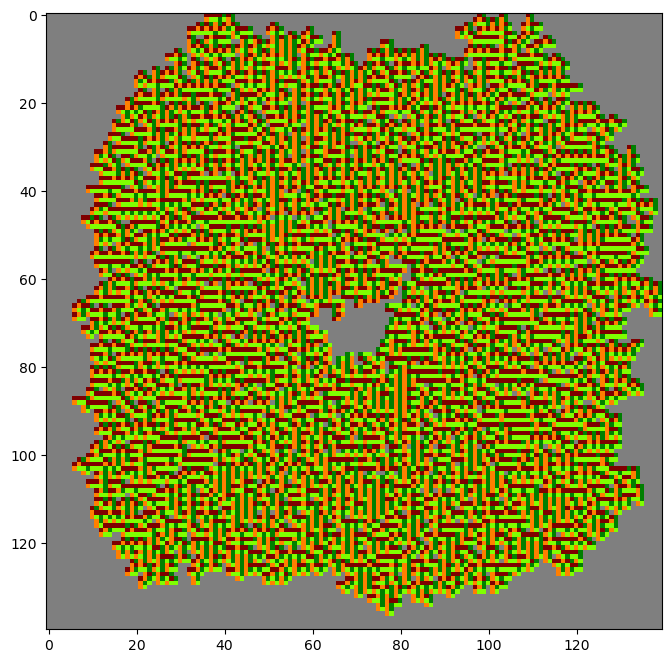

In [98]:
img = np.zeros((*data.shape, 3), dtype=float)

for i in range(1, len(path)):
    prev, pos = path[i-1:i+1]
    direction = pos - prev
    img[pos[0], pos[1]] = [*direction, -1]

plt.figure(figsize=(8, 8))
# plt.axis("off")

plt.imshow(img/2 + 0.5)
plt.show()


In [99]:
# North     East        South       West
img[5, 6],  img[6, 8],  img[7, 6],  img[6, 5]


(array([0., 0., 0.]),
 array([0., 0., 0.]),
 array([0., 0., 0.]),
 array([0., 0., 0.]))

In [100]:
def get_nearest_pipes(img, y, x):
    north_pipe = None
    east_pipe = None
    south_pipe = None
    west_pipe = None

    dy = 0
    while north_pipe is None:
        dy += 1
        if y - dy < 0:
            break
        if not np.array_equal(img[y-dy, x], [0, 0, 0]):
            north_pipe = img[y-dy, x]

    dx = 0
    while east_pipe is None:
        dx += 1
        if x + dx >= img.shape[1]:
            break
        if not np.array_equal(img[y, x+dx], [0, 0, 0]):
            east_pipe = img[y, x+dx]

    dy = 0
    while south_pipe is None:
        dy += 1
        if y + dy >= img.shape[0]:
            break
        if not np.array_equal(img[y+dy, x], [0, 0, 0]):
            south_pipe = img[y+dy, x]

    dx = 0
    while west_pipe is None:
        dx += 1
        if x - dx < 0:
            break
        if not np.array_equal(img[y, x-dx], [0, 0, 0]):
            west_pipe = img[y, x-dx]

    return north_pipe, east_pipe, south_pipe, west_pipe


In [101]:
def is_right_turn(n, e, s, w):
    correct_a = np.array([
        [ 0.,  1., -1.],
        [ 1.,  0., -1.],
        [ 0., -1., -1.],
        [-1.,  0., -1.]]
    )
    correct_b = np.array([
        [ 1.,  0., -1.],
        [ 1.,  0., -1.],
        [ 0., -1., -1.],
        [-1.,  0., -1.]]
    )
    test = np.array([n, e, s, w])
    return np.array_equal(test, correct_a) or np.array_equal(test, correct_b)


In [102]:
inside_count = 0
outside_count = 0

for y in range(img.shape[0]):
    for x in range(img.shape[1]):
        if not np.array_equal(img[y, x], [0, 0, 0]):
            continue

        # This is empty space
        # Walk up until we hit a pipe
        north_pipe, east_pipe, south_pipe, west_pipe = get_nearest_pipes(img, y, x)
        is_right = is_right_turn(north_pipe, east_pipe, south_pipe, west_pipe)
        if is_right:
            inside_count += 1
        else:
            outside_count += 1
        # print(f"{y}, {x}: {is_right}")


/tmp/ipykernel_37723/4218514313.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  test = np.array([n, e, s, w])


In [103]:
inside_count, outside_count


(93, 5335)

---

In [79]:
def solve(data):
    # 0 = nothing
    # 1 = on path
    # 2 = to the right of path
    # 3 = to the left of path

    start_pos, start_options = evaluate_start(data)
    print(f"Start Pos: {start_pos}\nStart Options: {start_options}")

    previous_pos = start_pos
    current_pos = start_options[0]

    path = [start_pos, current_pos]

    steps = 1
    while True:
        new_pos = step(data, current_pos, previous_pos)
        path.append(new_pos)
        steps += 1
        if np.array_equal(new_pos, start_pos):
            print(f"Found Start after {steps} steps.")
            print(f"Furthest Distance: {steps/2}")
            break
        previous_pos = current_pos
        current_pos = new_pos



    img = np.zeros(data.shape, dtype=float)

    prev_dir = np.array([0, 0])
    for i in range(0, len(path)-1):
        pos, next_pos = path[i:i+2]

        img[pos[0], pos[1]] = 1

        direction = next_pos - pos
        right_of_dir = direction @ np.array([[0, -1], [1, 0]])

        comb_dir = prev_dir + direction
        # print(comb_dir)

        inside_directions = []
        outside_directions = []

        # Both axis, this is a corner
        if comb_dir[0] != 0 and comb_dir[1] != 0:
            if np.dot(comb_dir, right_of_dir) < 0:
                print(f"Right turn at step {i}")
                # Right turn
                inside_directions = np.array([
                    right_of_dir,
                    [0, comb_dir[1]],
                    [comb_dir[0], 0]
                ])
                outside_directions = np.array([-d for d in inside_directions])
            else:
                print(f"Left turn at step {i}")
                # Left turn
                inside_directions = np.array([
                    right_of_dir,
                    [0, -comb_dir[1]],
                    [-comb_dir[0], 0]
                ])
                outside_directions = np.array([-d for d in inside_directions])
        else:
            inside_directions = [right_of_dir]
            outside_directions = [-right_of_dir]

        prev_dir = direction

        for dirs, mark in [[inside_directions, 3], [outside_directions, 2]]:
            for dir in dirs:
                j = 1
                while True:
                    new_pos = pos + j * dir
                    if new_pos[0] < 0 or new_pos[0] >= data.shape[0] or new_pos[1] < 0 or new_pos[1] >= data.shape[1]:
                        break
                    elif img[new_pos[0], new_pos[1]] == 1:
                        break
                    else:
                        img[new_pos[0], new_pos[1]] = mark
                    j += 1

    number_inside = np.sum(img == 3)
    number_outside = np.sum(img == 2)

    plt.figure(figsize=(8, 8))
    plt.title(f"Step {i} - {number_inside=} - {number_outside=}")
    plt.axis("off")
    im = plt.imshow(img)
    plt.colorbar(im)
    plt.show()

    return number_inside


Start Pos: [1 1]
Start Options: [[1 2]
 [2 1]]
Found Start after 44 steps.
Furthest Distance: 22.0
Right turn at step 7
Right turn at step 13
Right turn at step 16
Right turn at step 18
Left turn at step 20
Left turn at step 23
Left turn at step 28
Left turn at step 31
Right turn at step 33
Right turn at step 35
Right turn at step 38


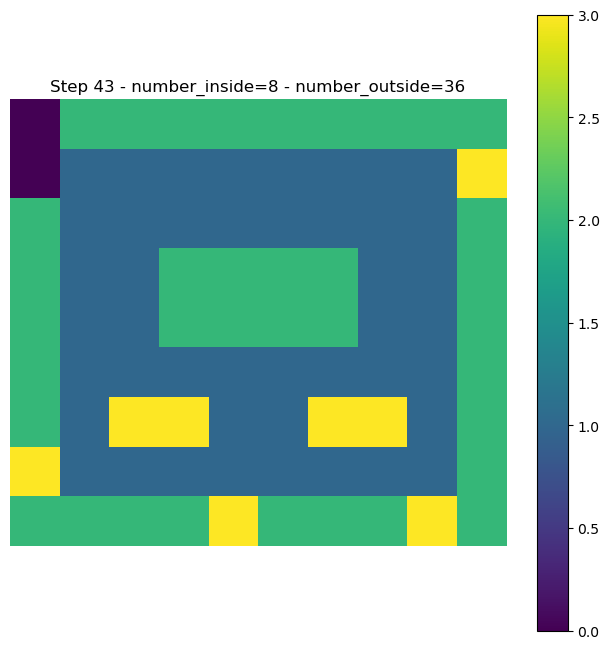

8

In [78]:
solve(testdata3)


Start Pos: [38 55]
Start Options: [[37 55]
 [39 55]]


Found Start after 14172 steps.
Furthest Distance: 7086.0


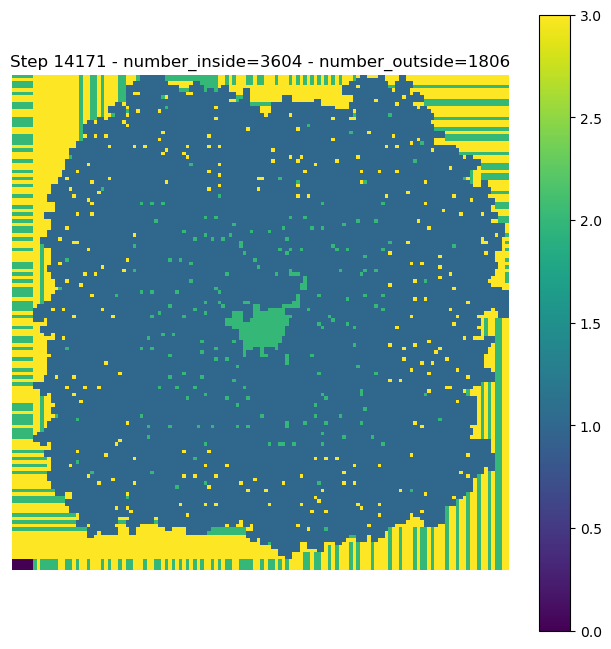

3604

In [72]:
solve(data)
